## **PROCESO DE ETL**
### PARA EL DATASET *Internet*

--- --- ---


#### **CARGA DE DATOS**

In [1]:
import pandas as pd

In [2]:
dataset_excel = 'datasets\original_datasets\Internet.xlsx'

In [3]:
# Se obtiene el nombre de todas las hojas
xls = pd.ExcelFile(dataset_excel)
print(xls.sheet_names)


['Acc_vel_loc_sinrangos', 'Velocidad_sin_Rangos', 'Accesos_tecnologia_localidad', 'Velocidad % por prov', 'Totales VMD', 'Totales Accesos Por Tecnología', 'Accesos Por Tecnología', 'Penetración-poblacion', 'Penetracion-hogares', 'Penetracion-totales', 'Totales Accesos por velocidad', 'Accesos por velocidad', 'Dial-BAf', 'Totales Dial-BAf', 'Ingresos ']


#### **DECISIÓN INICIAL: Selección de Hojas Relevantes para el Análisis**

#### Esta selección se ha realizado teniendo en cuenta los objetivos y la necesidad de generar insights útiles para el desarrollo del dashboard y el cálculo de KPIs.

- ***Acc_vel_loc_sinrangos***: Proporciona una visión detallada de los accesos a internet por localidad, lo cual es crucial para analizar el comportamiento a nivel regional y detectar áreas de mejora.

- ***Accesos_tecnologia_localidad***: Permite identificar las tecnologías predominantes en distintas localidades, un dato importante para optimizar la oferta de servicios.
- ***Accesos por velocidad***: Ayuda a evaluar la calidad del servicio de internet, considerando las velocidades de conexión en distintas zonas.
- ***Penetracion-poblacion***: Indicador clave para medir el alcance de los servicios de internet en la población general.
- ***Penetracion-hogares***: Complementa el análisis de penetración, enfocado en hogares, lo que es fundamental para conocer la expansión en este sector.
- ***Ingresos***: Aporta información económica sobre el rendimiento del servicio de internet, clave para evaluar su viabilidad y crecimiento.
- ***Velocidad % por prov***: Proporciona una distribución porcentual de la velocidad de conexión por provincia, esencial para comparar la calidad del servicio a nivel nacional.

#### Se realiza una inspección inicial para cada una de ellas, comprendiendo **distribuciones**, **outliers** y **valores nulos**

In [18]:
# Hojas más importantes
df_acc_vel_loc = pd.read_excel(dataset_excel, sheet_name='Acc_vel_loc_sinrangos')
df_accesos_tecnologia = pd.read_excel(dataset_excel, sheet_name='Accesos_tecnologia_localidad')
df_accesos_velocidad = pd.read_excel(dataset_excel, sheet_name='Accesos por velocidad')
df_penetracion_poblacion = pd.read_excel(dataset_excel, sheet_name='Penetración-poblacion')
df_penetracion_hogares = pd.read_excel(dataset_excel, sheet_name='Penetracion-hogares')
df_ingresos = pd.read_excel(dataset_excel, sheet_name='Ingresos ')
df_velocidad_prov = pd.read_excel(dataset_excel, sheet_name='Velocidad % por prov')

-----

### **``df_acc_vel_loc``**: visión detallada de los accesos a internet por localidad.

#### **Estructura**: 
- #### Se observan 125 columnas, representando las velocidades de conexión en diferentes Mbps.

In [29]:
df_acc_vel_loc.shape

(3065, 125)

In [27]:
df_acc_vel_loc.columns

Index(['Provincia', 'Partido', 'Localidad', 'Link Indec', 'Otros',
       '0,256 Mbps', '0,5 Mbps', '0,512 Mbps', '0,75 Mbps', '1 Mbps',
       ...
       '680 Mbps', '700 Mbps', '800 Mbps', '850 Mbps', '900 Mbps', '999 Mbps',
       '1000 Mbps', '1024 Mbps', '4000 Mbps', '10000 Mbps'],
      dtype='object', length=125)

In [28]:
df_acc_vel_loc.head(5)

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,...,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps,4000 Mbps,10000 Mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,NaN,2.0,NaN,19.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_acc_vel_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3065 entries, 0 to 3064
Columns: 125 entries, Provincia to 10000 Mbps
dtypes: float64(121), object(4)
memory usage: 2.9+ MB


In [21]:
df_acc_vel_loc.describe()

,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,"1,5 Mbps",2 Mbps,"2,2 Mbps","2,5 Mbps",...,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps,4000 Mbps,10000 Mbps
count,1030.000000,36.000000,642.000000,525.000000,284.000000,872.000000,15.000000,677.000000,1.0,4.000000,...,1.0,4.0,4.000000,1.0,1.0,17.000000,420.000000,2.0,1.0,2.000000
mean,318.614563,2.944444,42.978193,2.100952,39.588028,66.642202,132.533333,101.428360,18.0,156.500000,...,5.0,1.0,153.500000,1.0,110.0,3.352941,609.683333,1.0,1.0,5.000000
std,2964.939611,5.806127,985.466627,4.684645,118.563946,222.345674,291.222268,278.821468,NaN,212.528429,...,NaN,0.0,273.381906,NaN,NaN,5.700232,3431.387543,0.0,NaN,5.656854
min,-15.000000,1.000000,0.000000,1.000000,1.000000,0.000000,7.000000,1.000000,18.0,21.000000,...,5.0,1.0,1.000000,1.0,110.0,1.000000,1.000000,1.0,1.0,1.000000
25%,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,31.000000,4.000000,18.0,35.250000,...,5.0,1.0,10.750000,1.0,110.0,1.000000,17.000000,1.0,1.0,3.000000
50%,6.000000,1.000000,1.000000,1.000000,9.500000,10.000000,47.000000,21.000000,18.0,66.500000,...,5.0,1.0,25.000000,1.0,110.0,2.000000,139.500000,1.0,1.0,5.000000
75%,48.000000,2.000000,2.000000,1.000000,28.000000,40.250000,75.000000,77.000000,18.0,187.750000,...,5.0,1.0,167.750000,1.0,110.0,3.000000,498.000000,1.0,1.0,7.000000
max,87722.000000,31.000000,24968.000000,61.000000,1307.000000,4111.000000,1170.000000,3530.000000,18.0,472.000000,...,5.0,1.0,563.000000,1.0,110.0,25.000000,68405.000000,1.0,1.0,9.000000


#### **Valores Nulos**:
- #### Se mantienen valores nulos inicialmente, al brindar información para identificar las localidades o provincias con menos acceso a altas velocidades.

In [11]:
nulls = df_acc_vel_loc.isnull().sum()

In [12]:
nulls[nulls > 0]

0,256 Mbps    1003
0,5 Mbps       720
0,512 Mbps     777
0,75 Mbps      823
1 Mbps         523
              ... 
999 Mbps      1015
1000 Mbps      777
1024 Mbps     1028
4000 Mbps     1028
10000 Mbps    1028
Length: 120, dtype: int64

----

### **``df_accesos_tecnologia``**: tecnologías predominantes en distintas localidades.

#### **Estructura**:
- #### Se observan 3352 filas y 13 columnas.

In [15]:
df_accesos_tecnologia.shape

(3352, 13)

In [18]:
df_accesos_tecnologia.head()

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,755,4600,0,2,0,742,0,727,6826
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,496,16,0,0,185,1479
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6


In [20]:
df_accesos_tecnologia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3352 entries, 0 to 3351
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Provincia      3072 non-null   object
 1   Partido        3072 non-null   object
 2   Localidad      3072 non-null   object
 3   Link Indec     3072 non-null   object
 4   ADSL           3352 non-null   int64 
 5   CABLEMODEM     3352 non-null   int64 
 6   DIAL UP        3352 non-null   int64 
 7   FIBRA OPTICA   3352 non-null   int64 
 8   OTROS          3352 non-null   int64 
 9   SATELITAL      3352 non-null   int64 
 10  WIMAX          3352 non-null   int64 
 11  WIRELESS       3352 non-null   int64 
 12  Total general  3352 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 340.6+ KB


#### **Distribuciones**
- #### En la columna ``Total general``, hay un rango de valores bastante amplio, con un máximo de 1,504,711 accesos y una media de 3,470 accesos por localidad. Esto sugiere una gran diferencia entre localidades.

- #### Algunas tecnologías, como SATELITAL, WIMAX, y WIRELESS, tienen valores mínimos de 0, lo que indica que estas tecnologías no están presentes en todas las localidades.

In [21]:
df_accesos_tecnologia.describe()

,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
count,3352.000000,3.352000e+03,3352.000000,3352.000000,3352.000000,3352.000000,3352.000000,3352.000000,3.352000e+03
mean,231.048628,1.786085e+03,3.518198,1197.822494,71.906325,0.874105,0.652745,178.604415,3.470512e+03
std,1550.293816,2.181544e+04,41.351933,8522.597506,1012.885167,13.032554,14.459441,721.026209,3.040984e+04
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.175000e+01
50%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,1.235000e+02
75%,37.000000,0.000000e+00,0.000000,110.000000,0.000000,1.000000,0.000000,113.000000,8.172500e+02
max,70108.000000,1.177475e+06,2050.000000,281390.000000,46762.000000,742.000000,444.000000,19906.000000,1.504711e+06


#### **Valores Nulos**
- #### Hay 280 valores nulos en cada una de las columnas de texto (``Provincia``, ``Partido``, ``Localidad``, ``Link Indec``)
- #### Se eliminan los valores nulos dado que representan solo un 8% del total y no afectarán significativamente al análisis.

In [29]:
df_accesos_tecnologia.isnull().sum()

Provincia        280
Partido          280
Localidad        280
Link Indec       280
ADSL               0
CABLEMODEM         0
DIAL UP            0
FIBRA OPTICA       0
OTROS              0
SATELITAL          0
WIMAX              0
WIRELESS           0
Total general      0
dtype: int64

In [30]:
# Se eliminan filas con valores nulos en las columnas de texto
df_accesos_tecnologia = df_accesos_tecnologia.dropna(subset=['Provincia', 'Partido', 'Localidad', 'Link Indec'])

In [32]:
nulos_texto = df_accesos_tecnologia[['Provincia', 'Partido', 'Localidad', 'Link Indec']].isnull().sum()
print(nulos_texto)

Provincia     0
Partido       0
Localidad     0
Link Indec    0
dtype: int64


#### **Outliers**
- #### Los valores altos pueden reflejar localidades con muchas conexiones. Dado que representan áreas con muchos accesos podrían ser útiles para el análisis. Por lo tanto se mantienen los outliers.

In [33]:
import matplotlib.pyplot as plt

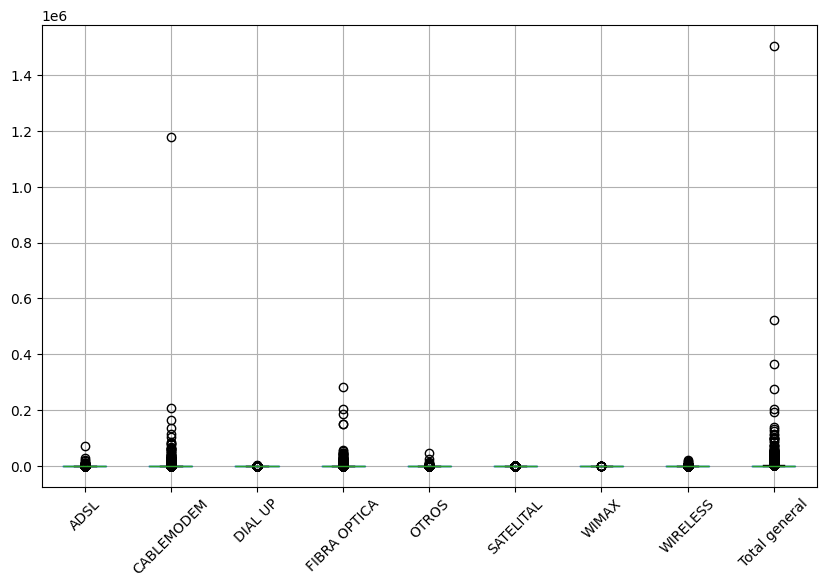

In [34]:
columnas_numericas = df_accesos_tecnologia.select_dtypes(include=['int64'])

# Boxplot
plt.figure(figsize=(10, 6))
columnas_numericas.boxplot()
plt.xticks(rotation=45)
plt.show()


---------

### **``df_accesos_velocidad``**: calidad del servicio de internet.

#### **Estructura**:
- #### El DataFrame tiene 984 entradas y 12 columnas que representan diferentes rangos de velocidades de conexión a internet.

In [36]:
df_accesos_velocidad.shape

(984, 12)

In [35]:
df_accesos_velocidad.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2024,1,Buenos Aires,26002.0,22510.0,221185.0,233225.0,241778.0,106418.0,4068292.0,125147.0,5044557.0
1,2024,1,Capital Federal,516.0,5418.0,29753.0,51415.0,37369.0,5957.0,1374283.0,0.0,1504711.0
2,2024,1,Catamarca,71.0,176.0,2872.0,3424.0,4204.0,1822.0,62294.0,70.0,74933.0
3,2024,1,Chaco,236.0,416.0,14156.0,9044.0,5533.0,5718.0,116624.0,3816.0,155543.0
4,2024,1,Chubut,111.0,1083.0,43828.0,31885.0,23024.0,20261.0,33844.0,16640.0,170676.0


#### **Valores Nulos** 
- #### Solo la columna ``OTROS`` tiene 6 valores nulos, lo cual es mínimo en relación al tamaño del DataFrame. Por lo tanto, serán eliminadas.

In [38]:
df_accesos_velocidad.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  984 non-null    int64  
 1   Trimestre            984 non-null    int64  
 2   Provincia            984 non-null    object 
 3   HASTA 512 kbps       984 non-null    float64
 4   + 512 Kbps - 1 Mbps  984 non-null    float64
 5   + 1 Mbps - 6 Mbps    984 non-null    float64
 6   + 6 Mbps - 10 Mbps   984 non-null    float64
 7   + 10 Mbps - 20 Mbps  984 non-null    float64
 8   + 20 Mbps - 30 Mbps  984 non-null    float64
 9   + 30 Mbps            984 non-null    float64
 10  OTROS                978 non-null    float64
 11  Total                984 non-null    float64
dtypes: float64(9), int64(2), object(1)
memory usage: 92.4+ KB


In [40]:
# Se eliminan las filas con valores nulos en la columna 'OTROS'
df_accesos_velocidad = df_accesos_velocidad.dropna(subset=['OTROS'])

#### **Distribuciones**:
- #### Las columnas como + 512 Kbps - 1 Mbps y 1 Mbps - 6 Mbps tienen valores muy amplios, desde 0 hasta cientos de miles, lo que refleja la diferencia en el número de conexiones por provincia.

In [39]:
df_accesos_velocidad.describe()

,Año,Trimestre,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
count,984.000000,984.000000,984.000000,984.000000,9.840000e+02,984.000000,984.000000,984.000000,9.840000e+02,978.000000,9.840000e+02
mean,2018.658537,2.463415,1967.099593,9134.977642,1.347227e+05,38149.252033,37076.536585,20064.129065,1.157046e+05,6267.931493,3.630490e+05
std,3.002418,1.128870,12757.059460,20796.531611,3.245957e+05,64289.080670,88748.124134,69777.001896,4.502564e+05,14923.597928,7.810485e+05
min,2014.000000,1.000000,6.000000,0.000000,1.336000e+03,0.000000,0.000000,0.000000,0.000000e+00,-1945.000000,1.240600e+04
25%,2016.000000,1.000000,41.000000,384.750000,2.417200e+04,3662.500000,2336.250000,40.000000,1.175000e+01,0.000000,6.082625e+04
50%,2019.000000,2.000000,107.000000,2217.500000,4.285500e+04,13040.500000,10115.500000,1559.820000,3.272500e+03,165.500000,1.109070e+05
75%,2021.000000,3.000000,467.250000,6946.750000,8.389625e+04,41836.750000,26436.000000,9996.250000,3.894525e+04,6617.250000,1.921040e+05
max,2024.000000,4.000000,238920.000000,171244.480000,2.299705e+06,403575.000000,886678.000000,949093.000000,4.068292e+06,125147.000000,5.044557e+06


---------

### **``df_penetracion_poblacion``**: alcance de los servicios de internet en la población general


#### **Estructura:**

- #### El DataFrame tiene 984 entradas y 4 columnas: ``Año``, ``Trimestre``, ``Provincia`` y `Accesos por cada 100 hab`.
- #### No tiene valores nulos.

In [44]:
df_penetracion_poblacion.shape

(984, 4)

In [42]:
df_penetracion_poblacion.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2024,1,Buenos Aires,27.80
1,2024,1,Capital Federal,48.78
2,2024,1,Catamarca,17.50
3,2024,1,Chaco,12.48
4,2024,1,Chubut,26.02


#### **Distribución**
- #### La columna ``Accesos por cada 100 hab`` tiene una media de 15.5 accesos por cada 100 habitantes, con un máximo de 52 accesos y un mínimo de 2.68 accesos.
- #### Los valores más altos de penetración indican provincias con mejor acceso a internet en relación a su población.

In [43]:
df_penetracion_poblacion.info()
df_penetracion_poblacion.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Año                       984 non-null    int64  
 1   Trimestre                 984 non-null    int64  
 2   Provincia                 984 non-null    object 
 3   Accesos por cada 100 hab  984 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.9+ KB


,Año,Trimestre,Accesos por cada 100 hab
count,984.000000,984.000000,984.000000
mean,2018.634146,2.463415,15.537902
std,2.962686,1.128870,9.205334
min,2014.000000,1.000000,2.684669
25%,2016.000000,1.000000,8.909018
50%,2019.000000,2.000000,13.571293
75%,2021.000000,3.000000,19.972549
max,2024.000000,4.000000,52.236739


--------

### **``df_penetracion_hogares``**: alcance de los servicios de internet en los hogares.


#### **Estructura:**
- #### El DataFrame tiene 984 entradas y 4 columnas: Año, Trimestre, Provincia y Accesos por cada 100 hogares.
- #### No hay valores nulos.

In [45]:
df_penetracion_hogares.shape

(984, 4)

In [46]:
df_penetracion_hogares.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2024,1,Buenos Aires,81.10
1,2024,1,Capital Federal,119.53
2,2024,1,Catamarca,68.82
3,2024,1,Chaco,46.70
4,2024,1,Chubut,84.89


#### **Distribuciones**:
- #### La columna ``Accesos por cada 100 hogares`` tiene una media de 52 accesos por cada 100 hogares, con un máximo de 124 accesos y un mínimo de 9.34 accesos.
Los accesos en los hogares son claramente más altos que en la población general, y esto tiene sentido, ya que muchas familias tienen más de un acceso por hogar.

In [47]:
df_penetracion_hogares.info()
df_penetracion_hogares.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           984 non-null    int64  
 1   Trimestre                     984 non-null    int64  
 2   Provincia                     984 non-null    object 
 3   Accesos por cada 100 hogares  984 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.9+ KB


,Año,Trimestre,Accesos por cada 100 hogares
count,984.000000,984.000000,984.000000
mean,2018.634146,2.463415,52.159491
std,2.962686,1.128870,24.036101
min,2014.000000,1.000000,9.347208
25%,2016.000000,1.000000,33.204632
50%,2019.000000,2.000000,49.435000
75%,2021.000000,3.000000,65.706626
max,2024.000000,4.000000,124.061394


-------

### **``df_ingresos``**: información sobre los ingresos generados por los servicios de internet.

#### **Estructura:**
- #### El DataFrame tiene 41 entradas y 4 columnas: ``Año``, ``Trimestre``, ``Ingresos (miles de pesos)`` y `Periodo`.
- #### No hay valores nulos
- #### La columa ``Año`` tenía un error de tipeo registrando el año 2023 como 2033. Por lo tanto, se lo corrigió registrandolo correctamente.

In [48]:
df_ingresos.shape

(41, 4)

In [49]:
df_ingresos.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024,1,2.804191e+08,Ene-Mar 2024
1,2023,4,1.673760e+08,Oct-Dic 2023
2,2023,3,1.331066e+08,Jul-Sept 2023
3,2023,2,1.180603e+08,Jun-Mar 2023
4,2033,1,1.041350e+08,Ene-Mar 2023


In [51]:
# Corregir el error en el año "2033" reemplazándolo por "2023"
df_ingresos['Año'] = df_ingresos['Año'].replace(2033, 2023)

In [53]:
df_ingresos.info()
df_ingresos.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        41 non-null     int64  
 1   Trimestre                  41 non-null     int64  
 2   Ingresos (miles de pesos)  41 non-null     float64
 3   Periodo                    41 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


,Año,Trimestre,Ingresos (miles de pesos)
count,41.000000,41.000000,4.100000e+01
mean,2018.634146,2.463415,3.885074e+07
std,2.997967,1.142313,5.422892e+07
min,2014.000000,1.000000,2.984054e+06
25%,2016.000000,1.000000,6.912442e+06
50%,2019.000000,2.000000,2.020741e+07
75%,2021.000000,3.000000,4.299994e+07
max,2024.000000,4.000000,2.804191e+08


---

### **``df_velocidad_prov``**: distribución porcentual de las velocidades de conexión a internet por provincia.

#### **Estructura:**
- #### El DataFrame tiene 984 entradas y 4 columnas: ``Año``, ``Trimestre``, ``Provincia`` y ``Mbps (Media de bajada).``
- #### No hay valores nulos.

In [55]:
df_velocidad_prov.shape

(984, 4)

In [56]:
df_velocidad_prov.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2024,1,Buenos Aires,159.13
1,2024,1,Capital Federal,229.94
2,2024,1,Catamarca,91.45
3,2024,1,Chaco,107.51
4,2024,1,Chubut,20.50


#### **Distribuciones**
- #### La columna Mbps (Media de bajada) tiene un valor medio de 23 Mbps, con un máximo de 234 Mbps y un mínimo de 2.57 Mbps. Estas variaciones reflejan la diferencia en las velocidades de internet entre provincias.

#### **Outliers:**
- #### Los valores muy altos reflejan provincias con mejor infraestructura y mayor velocidad de internet. Se los mantienen ya que reflejan la diversidad de las velocidades de conexión entre provincias.

In [57]:
df_velocidad_prov.info()
df_velocidad_prov.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     984 non-null    int64  
 1   Trimestre               984 non-null    int64  
 2   Provincia               984 non-null    object 
 3   Mbps (Media de bajada)  984 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.9+ KB


,Año,Trimestre,Mbps (Media de bajada)
count,984.000000,984.000000,984.000000
mean,2018.634146,2.463415,23.186898
std,2.962686,1.128870,31.623977
min,2014.000000,1.000000,2.573729
25%,2016.000000,1.000000,4.762379
50%,2019.000000,2.000000,9.307228
75%,2021.000000,3.000000,27.636730
max,2024.000000,4.000000,234.440000


-------

#### **EXPORTACIÓN DE DATOS**

##### Se exportarán por separado, cada uno de los dataframes brevemente procesados en formato CSV para su posterior implementación en una Base de Datos SQL.

In [58]:
# Se exportan todos los DataFrames a CSV para carga en SQL

df_acc_vel_loc.to_csv('accesos_velocidad_localidad.csv', index=False)
df_accesos_tecnologia.to_csv('accesos_tecnologia_localidad.csv', index=False)
df_accesos_velocidad.to_csv('accesos_por_velocidad.csv', index=False)
df_penetracion_poblacion.to_csv('penetracion_internet_poblacion.csv', index=False)
df_penetracion_hogares.to_csv('penetracion_internet_hogares.csv', index=False)
df_ingresos.to_csv('ingresos_servicios_internet.csv', index=False)
df_velocidad_prov.to_csv('velocidad_media_provincia.csv', index=False)

